Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 densenet121 (Functional)    (None, 1024)              7037504   
                                                                 
 dense_4 (Dense)             (None, 256)               262400    
                                                                 
 dropout_2 (Dropout)         (None, 256)               0         
                                                                 
 dense_5 (Dense)             (None, 100)               25700     
                                                                 
Total params: 7,325,604
Trainable params: 7,241,956
Non-trainable params: 83,648
_________________________________________________________________
Epoch 1/20
390/390 [==============================] - 68s 138ms/step - loss: 4.3849 - accuracy: 0.0672 - val_loss: 3.5698 - val_accuracy: 0.2236
Epoch 2/20
390/390 [======

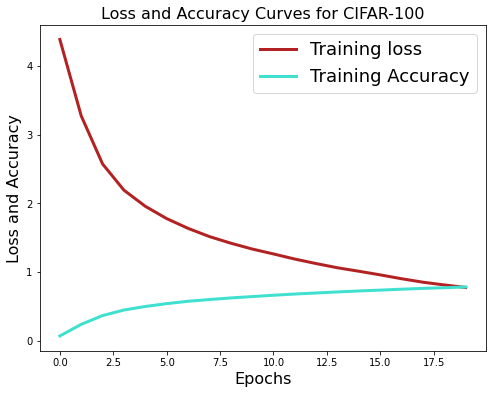

In [3]:
# import all the libraries
import numpy as np
import sklearn.metrics as metrics
from keras.applications import densenet
from keras.datasets import cifar100
from keras.utils import np_utils
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Dense,Flatten,Dropout
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# for removing warnings
import warnings
warnings.filterwarnings('ignore')

# define imagenet-pretrained model for densenet(cifar100)
model = Sequential()
model.add(densenet.DenseNet121(weights='imagenet', include_top=False,
input_shape=(32,32,3), pooling='max'))
# adding dense layer for flatten 
model.add(Dense(256, activation='relu'))
# deactivating 50% nodes
model.add(Dropout(0.5))
model.add(Dense(100, activation='softmax')) 
# find summary
model.summary()
# Splitting traning and testing set
(cifarx_train, cifary_train), (cifarx_test, cifary_test) = cifar100.load_data()
# Converting to float
cifarx_train = cifarx_train.astype('float32')
cifarx_test = cifarx_test.astype('float32')
# converting data into normalize form
cifarx_train = densenet.preprocess_input(cifarx_train)
cifarx_test = densenet.preprocess_input(cifarx_test)
# data augmentation
datagen = ImageDataGenerator(rotation_range=15, width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
datagen.fit(cifarx_train)
# one-hot encoding
Y_train = np_utils.to_categorical(cifary_train, 100)
Y_test = np_utils.to_categorical(cifary_test, 100)
# Using Adam optimizer to speed up training and set learning rate 0.001
optimizer = Adam(lr=1e-4)  
# compile the model
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=["accuracy"])
# train the model
history = model.fit(datagen.flow(cifarx_train, Y_train, batch_size=128),
                    steps_per_epoch=len(cifarx_train) / 128, epochs=20,
                    validation_data=(cifarx_test, Y_test))
Preds = model.predict(cifarx_test)
y_Pred = np.argmax(Preds, axis=1)
y_true = cifary_test.flatten()
# finding accuracy and loss
accuracy = metrics.accuracy_score(y_true, y_Pred) * 100
# print testing accuracy
print("Accuracy : ", accuracy)
# Define plotchart function
def plotchart(history, value):
    plt.figure(figsize=[8,6])
    plt.plot(history.history['loss'], 'firebrick', linewidth=3.0)
    plt.plot(history.history['accuracy'], 'turquoise', linewidth=3.0)
    plt.legend(['Training loss', 'Training Accuracy'], fontsize=18)
    plt.xlabel('Epochs', fontsize=16)
    plt.ylabel('Loss and Accuracy', fontsize=16)
    plt.title('Loss and Accuracy Curves for {}'.format(value), fontsize=16)
    plt.show()
# Plot the training history
plotchart(history, 'CIFAR-100')
